<a href="https://colab.research.google.com/github/akshaya-9/EmotionDetection/blob/main/EmotionDetectorIMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Emotion Detection**





# Importing Library 

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Flatten,Dense,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D 
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam 
from keras.utils import np_utils  


# Loading Data

In [ ]:
data  = pd.read_csv('/content/drive/MyDrive/fer2013.csv')

In [ ]:
data['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
len(data.index)

35887

In [ ]:
data['Usage'].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [ ]:
print(data)

       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


In [ ]:
data.size

107661

# Splitting training and testing data

In [ ]:
x_train =[]
y_train =[]
x_test = []
y_test =[]

In [ ]:
for index,row in data.iterrows():
  k = row['pixels'].split(" ")
  if row['Usage'] == 'Training':
    x_train.append(np.array(k))
    y_train.append(row['emotion'])
  elif row['Usage'] == 'PrivateTest' or row['Usage'] == 'PublicTest' :
    x_test.append(np.array(k))
    y_test.append(row['emotion'])

# Reshaping training and testing data

In [ ]:
x_train = np.array(x_train,'float32')
y_train = np.array(y_train,'float32')
x_test = np.array(x_test,'float32')
y_test =np.array(y_test,'float32')

In [ ]:
x_train[0]

array([ 70.,  80.,  82., ..., 106., 109.,  82.], dtype=float32)

In [ ]:
x_train -= np.mean(x_train, axis=0)  
x_train /= np.std(x_train, axis=0)  
  
x_test -= np.mean(x_test, axis=0)  
x_test /= np.std(x_test, axis=0)  


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)  
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)  

In [ ]:
x_train.shape[0]

28709

In [ ]:
from keras.utils import np_utils  
from keras.utils.np_utils import to_categorical
y_train =np_utils.to_categorical(y_train,num_classes=7)
y_test = np_utils.to_categorical(y_test,num_classes=7)

In [ ]:
y_test.shape

(7178, 7)

In [ ]:
x_train.shape

(28709, 48, 48, 1)

In [ ]:
x_test.shape

(7178, 48, 48, 1)

In [ ]:
y_train.shape

(28709, 7)

In [ ]:
data.dtypes

emotion     int64
pixels     object
Usage      object
dtype: object

# Model Building
* 2 layers 1 cnn ,100 epochs = 55.17%

*   3 layers ,1 cnn, 1 max pool , 2 dense , 10 epochs  =  56.84%
*   3 layers ,2 cnn ,1 max pool , 2 dense ,10 epochs= 56.3 %
*   3 layers ,3 cnn , 1 maxpool ,2 dens ,10 epochs = 55.11 %


* 0.5 drop out - 57.79%
* 0.25 drop - 62.19%

In [ ]:
num_labels = 7  

In [ ]:
model = Sequential()
#layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1),padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# layer 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#layer 3
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#layer4 
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)       

# Optimizers
 * SGD - 46.85%
 * ADAM - 51.35 % 30 epochs  batch size =32

 * ADAM - 55.34% 30 epochs   batch size = 64

 * ADAM - 58.50% 40 epochs batch size =128

 * ADAm -55.53% 100 pochs batch size =32

 * ADAM -  56.35%  32 epochs  batch size =32
  
 

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
 import tensorflow as tf
 early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=8, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)

In [ ]:

history = model.fit(x_train,y_train,batch_size=120,epochs=100,verbose=1,validation_data=(x_test,y_test), callbacks=[early_stopping], shuffle=True)


Epoch 1/100
240/240 [==============================] - 49s 14ms/step - loss: 1.8436 - accuracy: 0.2266 - val_loss: 1.7696 - val_accuracy: 0.2575
Epoch 2/100
240/240 [==============================] - 2s 10ms/step - loss: 1.7120 - accuracy: 0.3106 - val_loss: 1.5054 - val_accuracy: 0.4199
Epoch 3/100
240/240 [==============================] - 2s 10ms/step - loss: 1.5292 - accuracy: 0.4043 - val_loss: 1.3887 - val_accuracy: 0.4698
Epoch 4/100
240/240 [==============================] - 2s 10ms/step - loss: 1.4282 - accuracy: 0.4453 - val_loss: 1.3263 - val_accuracy: 0.4863
Epoch 5/100
240/240 [==============================] - 2s 10ms/step - loss: 1.3764 - accuracy: 0.4648 - val_loss: 1.2814 - val_accuracy: 0.5077
Epoch 6/100
240/240 [==============================] - 2s 10ms/step - loss: 1.3343 - accuracy: 0.4884 - val_loss: 1.2491 - val_accuracy: 0.5143
Epoch 7/100
240/240 [==============================] - 2s 10ms/step - loss: 1.3047 - accuracy: 0.4966 - val_loss: 1.2035 - val_accuracy

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print(scores)
print("Testing Accuracy: %.2f%%" % (scores[1]*100))

[1.025733470916748, 0.6121482253074646]
Testing Accuracy: 61.21%


# Plotting Graph

In [ ]:
%matplotlib inline

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()


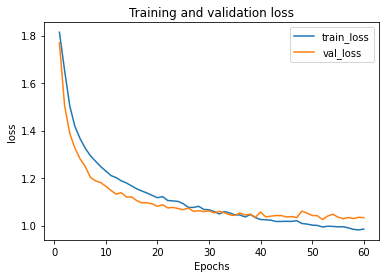

In [ ]:

plot_metric(history, 'loss') 

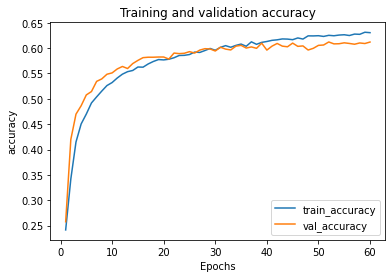

In [ ]:
plot_metric(history, 'accuracy') 

#  Saving the model

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
 json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# Open CV

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
from keras.models import model_from_json
import cv2,time
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))